[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/scipy_sample.ipynb)

In [2]:
import numpy as np
from scipy import linalg
arr=np.array([[1,2],[3,4]])
linalg.det(arr)

-2.0

In [3]:
arr=np.array([[3,2],[6,4]])
linalg.det(arr)

0.0

In [4]:
arr=np.array([[1,2],[3,4]])
iarr=linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [5]:
np.allclose(np.dot(arr,iarr),np.eye(2))

True

In [6]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [7]:
np.eye(5, k=1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [8]:
np.eye(5, dtype=complex)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

[]

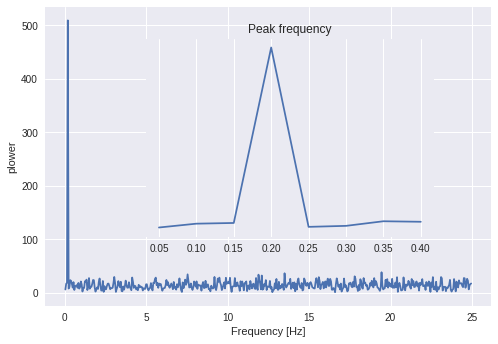

In [12]:
import numpy as np
from scipy import fftpack
import pylab as pl


np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

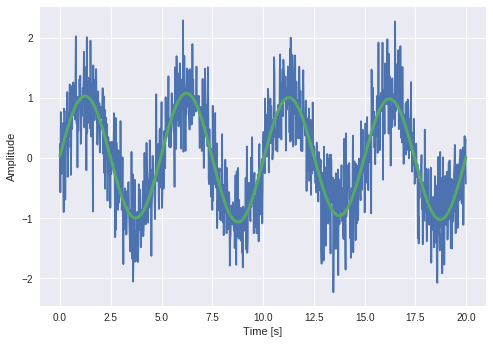

In [13]:
import numpy as np
from scipy import fftpack
import pylab as pl

np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

pl.figure()
pl.plot(time_vec, sig)
pl.plot(time_vec, main_sig, linewidth=3)
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')

Saving moonlanding.png to moonlanding.png


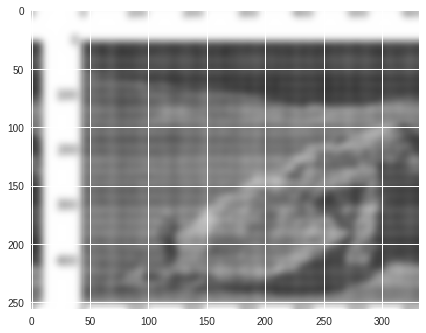

In [14]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# read image
img = plt.imread('moonlanding.png')

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

# Further exercise (only if you are familiar with this stuff):
#
# A "wrapped border" appears in the upper left and top edges of the
# image. This is because the padding is not done correctly, and does
# not take the kernel size into account (so the convolution "flows out
# of bounds of the image").  Try to remove this artifact.

Saving populations.txt to populations.txt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


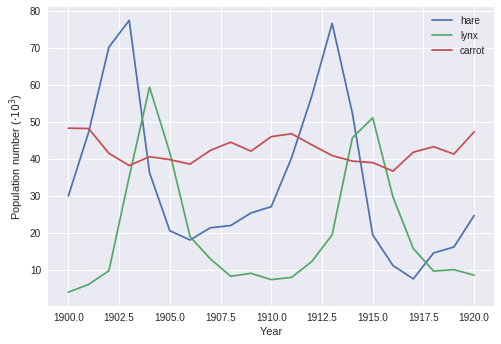

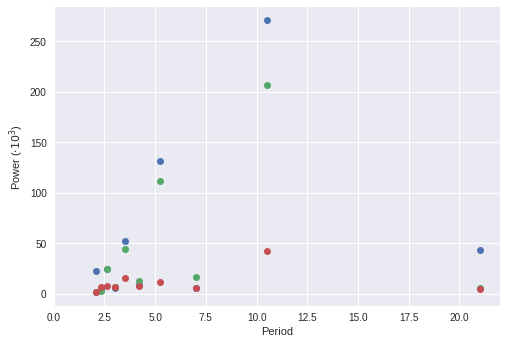

In [15]:
"""
Discover the periods in ../../data/populations.txt
"""
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

data = np.loadtxt('populations.txt')
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

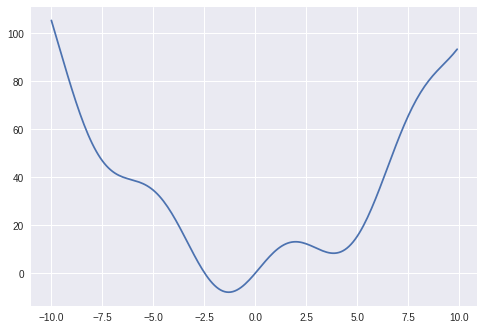

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
def f(x):
  return x**2+10*np.sin(x)
x=np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

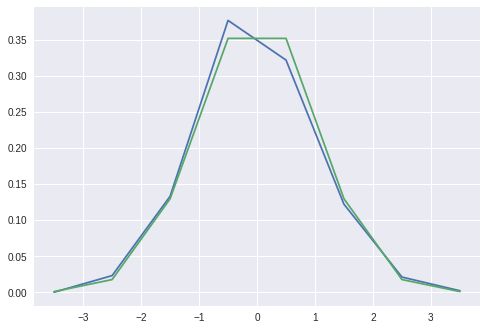

In [11]:
import random
a=np.random.normal(size=1000)
bins=np.arange(-4,5)
histogram=np.histogram(a,bins=bins,normed=True)[0]
bins=0.5*(bins[1:]+bins[:-1])
from scipy import stats
b=stats.norm.pdf(bins)
plt.plot(bins,histogram)
plt.plot(bins,b)
plt.show()

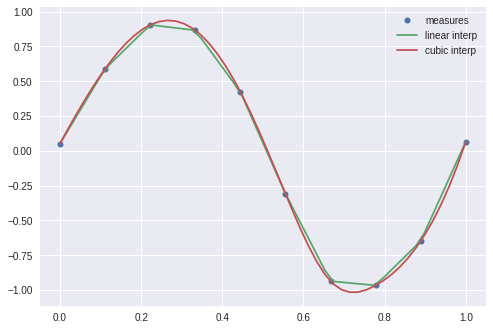

In [16]:
import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time=np.linspace(0,1,10)
noise=(np.random.random(10)*2-1)*1e-1
measures=np.sin(2*np.pi*measured_time)+noise
linear_interp=interp1d(measured_time,measures)
computed_time=np.linspace(0,1,50)
linear_results=linear_interp(computed_time)
cubic_interp=interp1d(measured_time,measures,kind='cubic')
cubic_results=cubic_interp(computed_time)
pl.plot(measured_time,measures,'o',ms=6,label='measures')
pl.plot(computed_time,linear_results,label='linear interp')
pl.plot(computed_time, cubic_results,label='cubic interp')
pl.legend()

In [20]:
from scipy.integrate import quad
res,err=quad(np.sin,0,np.pi/2)
def calc_derivative(ypos,time,counter_arr):
  counter_arr+=1
  return -2*ypos
counter=np.zeros((1,),dtype=np.uint16)
from scipy.integrate import odeint
time_vec=np.linspace(0,4,40)
yvec,info=odeint(calc_derivative,1,time_vec,args=(counter,),full_output=True)
counter

array([129], dtype=uint16)

In [21]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

Text(0,0.5,'y position [m]')

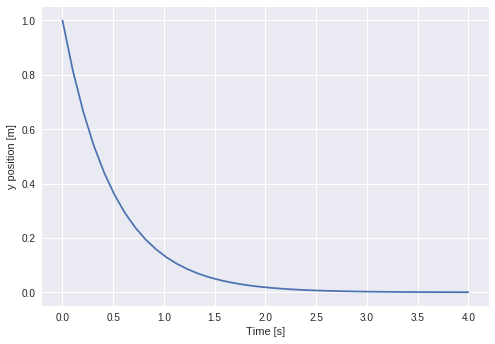

In [23]:
import numpy as np
from scipy.integrate import odeint
import pylab as pl

def calc_derivative(ypos,time):
  return -2*ypos
time_vec=np.linspace(0,4,40)
yvec=odeint(calc_derivative,1,time_vec)
pl.plot(time_vec,yvec)
pl.xlabel('Time [s]')
pl.ylabel('y position [m]')

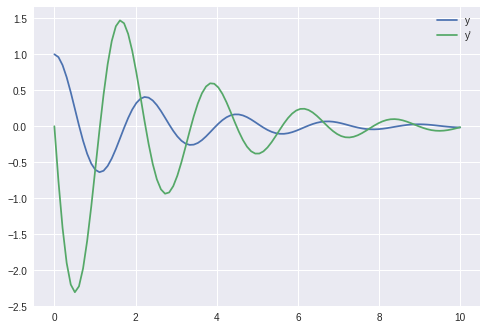

In [24]:
import numpy as np
from scipy.integrate import odeint
import pylab as pl
mass=0.5
kspring=4
cviscious=0.4
nu_coef=cviscious/mass
om_coef=kspring/mass
def calc_deri(yvec,time,nuc,omc):
  return (yvec[1], -nuc*yvec[1]-omc*yvec[0])
time_vec=np.linspace(0,10,100)
yarr=odeint(calc_deri,(1,0),time_vec,args=(nu_coef,om_coef))
pl.plot(time_vec,yarr[:,0],label='y')
pl.plot(time_vec,yarr[:,1],label="y'")
pl.legend()

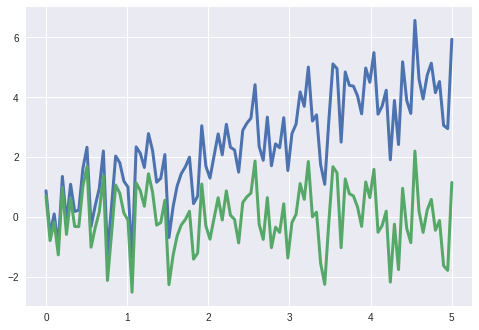

In [25]:
from matplotlib import pyplot as plt
from scipy import signal
t=np.linspace(0,5,100)
x=t+np.random.normal(size=100)
plt.plot(t,x,linewidth=3)
plt.plot(t,signal.detrend(x),linewidth=3)

In [4]:
from scipy import misc
from scipy import ndimage
import numpy as np
from scipy import signal
el=ndimage.generate_binary_structure(2,1)
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [5]:
#Erosion
a=np.zeros((7,7),dtype=np.int)
a[1:6,2:5]=1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [6]:
#Dilation
a=np.zeros((5,5))
a[2,2]=1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [7]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
#Opening
a=np.zeros((5,5),dtype=np.int)
a[1:4,1:4]=1
a[4,4]=1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [10]:
ndimage.binary_opening(a,structure=np.ones((3,3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


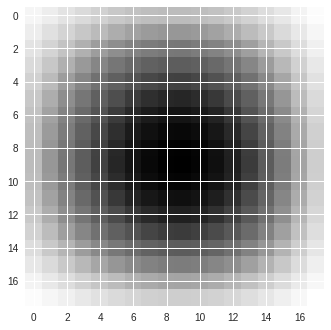

In [23]:
x,y=np.indices((100,100))
sig=np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask=sig>1
labels,nb=ndimage.label(mask)
areas=ndimage.sum(mask,labels,range(1,labels.max()+1))
maxima=ndimage.maximum(sig,labels,range(1,labels.max()+1))
ndimage.find_objects(labels==4)
sl=ndimage.find_objects(labels==4)
import matplotlib.pyplot as plt
plt.imshow(sig[sl[0]])


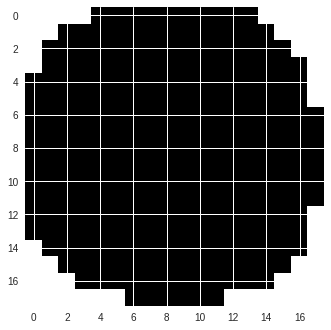

In [27]:
plt.imshow(mask[sl[0]])

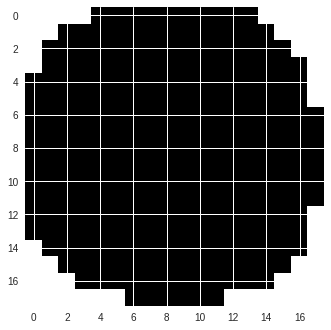

In [25]:
plt.imshow(labels[sl[0]])

In [30]:
time_step=0.02
period=5.
time_vec=np.arange(0,20,time_step)
sig=np.sin(2*np.pi/period*time_vec)+0.5*np.random.randn(time_vec.size)
from scipy import fftpack
sample_freq=fftpack.fftfreq(sig.size,d=time_step)
sig_fft=fftpack.fft(sig)
pidxs=np.where(sample_freq>0)
freqs=sample_freq[pidxs]
power=np.abs(sig_fft[pidxs])

[]

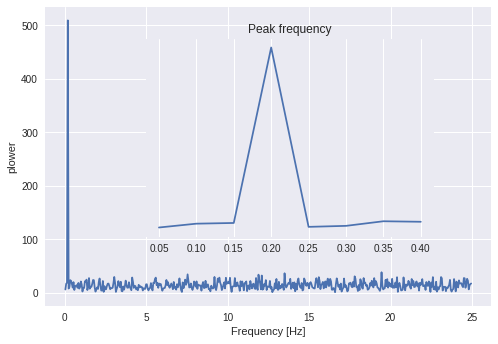

In [31]:
import numpy as np
from scipy import fftpack
import pylab as pl


np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

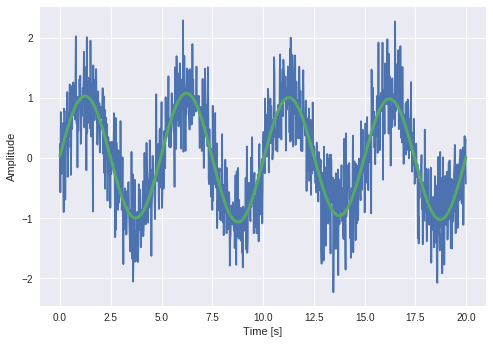

In [34]:
import numpy as np
from scipy import fftpack
import pylab as pl

np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

pl.figure()
pl.plot(time_vec, sig)
pl.plot(time_vec, main_sig, linewidth=3)
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')